In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import offsetbox
from time import time
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler, scale
from sklearn.manifold import SpectralEmbedding, TSNE
from sklearn.cross_decomposition import CCA

X = pd.read_csv('/Users/Divyansh/Downloads/fa2017_competition_1/Extracted_features.csv', header= None)
seeds = pd.read_csv('/Users/Divyansh/Downloads/fa2017_competition_1/Seed.csv', header= None)

n_samples, n_features = X.shape

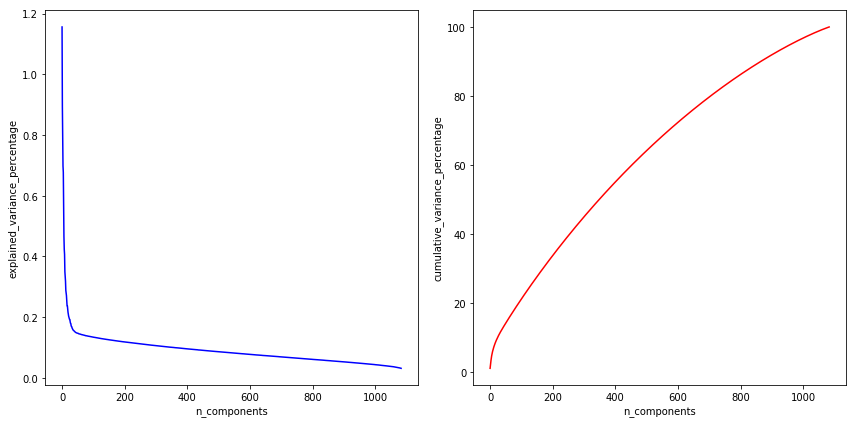

In [79]:
def plt_PCA(X) :
    X_std = StandardScaler().fit_transform(X)

    pca = PCA()
    # Plot the PCA spectrum
    pca.fit(X_std)

    plt.clf()
    fig = plt.figure(figsize=(12, 6))

    ax1 = fig.add_subplot(121)
    ax1.plot(pca.explained_variance_ratio_ * 100, 'b-')
    ax1.set_xlabel('n_components')
    ax1.set_ylabel('explained_variance_percentage')

    ax2 = fig.add_subplot(122)
    ax2.plot(pca.explained_variance_ratio_.cumsum() * 100, 'r-')
    ax2.set_xlabel('n_components')
    ax2.set_ylabel('cumulative_variance_percentage')

    plt.tight_layout()
    plt.show()

plt_PCA(X)

In [3]:
# X_std = StandardScaler().fit_transform(X)


# kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
# X_kpca = kpca.fit_transform(X)
# X_back = kpca.inverse_transform(X_kpca)

# def plt_PCA:
#     plt.clf()
#     fig = plt.figure(figsize=(12, 6))

#     ax1 = fig.add_subplot(121)
#     ax1.plot(pca.explained_variance_ratio_ * 100, 'b-')
#     ax1.set_xlabel('n_components')
#     ax1.set_ylabel('explained_variance_percentage')

#     ax2 = fig.add_subplot(122)
#     ax2.plot(pca.explained_variance_ratio_.cumsum() * 100, 'r-')
#     ax2.set_xlabel('n_components')
#     ax2.set_ylabel('cumulative_variance_percentage')

#     plt.tight_layout()
#     plt.show()

kpca.lambdas_

NameError: name 'kpca' is not defined

In [4]:
data = pd.read_csv('/Users/Divyansh/Downloads/fa2017_competition_1/Graph.csv', header= None)
data = data.values

n = max(max(i, j) for i, j in data) # Get size of matrix
print(n)
matrix = [[0] * n for i in range(n)]

for i,j in data:
    matrix[i-1][j-1] = 1 # Convert to 0-based index.
    matrix[j-1][i-1] = 1

matrix = np.matrix(matrix)

6000


In [80]:
# choose n_features for graph embedding
k = 1000

spectral = SpectralEmbedding(n_components=k, eigen_solver='arpack', affinity="precomputed")
X_sp = spectral.fit_transform(matrix)

In [95]:
# Custom implementation of CCA, as scikit support for CCA is not optimal.
# Source: https://github.com/gallantlab/pyrcca 
#(Docs: https://www.frontiersin.org/articles/10.3389/fninf.2016.00049/full)
import rcca

# Can use rcca.CCACrossValidate for hyperpararmeter search 
cca = rcca.CCA(kernelcca = False, reg = 0., numCC = 1000)
cor = cca.train([X[:6000].values, X_sp])


Training CCA, regularization = 0.0000, 1000 components


In [96]:
X_pred = X[6000:]
X_train = X[:6000]
X_ = (X_pred - X_train.mean()).values
X_comb = np.dot(X_, cor.ws[0])

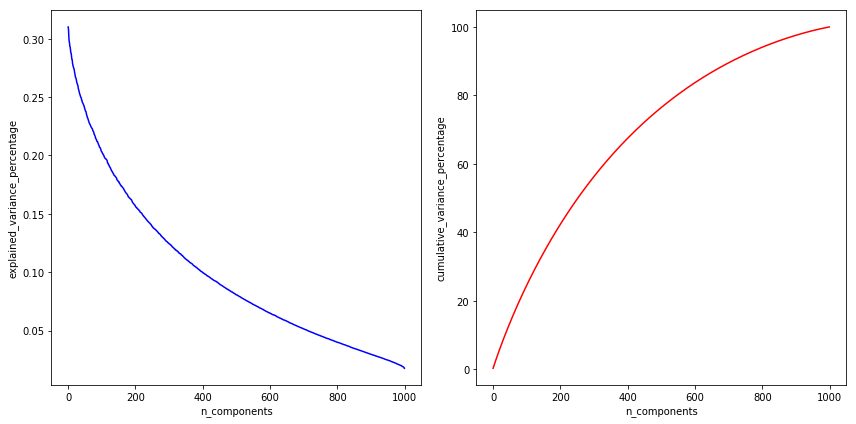

In [97]:
X_comb.shape
plt_PCA(X_comb)

In [98]:
# Scale and visualize the embedding vectors
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
#         plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                  color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[y[i]], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
            
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

def plot_embedding_test(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
#         plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                  color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for k in range(seeds.shape[0]):
            i = seeds[0][k]
            dist = np.sum((X[i] - shown_images) ** 2, 1)
#             if np.min(dist) < 4e-3:
#                 # don't show points that are too close
#                 continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[seeds[1][k]], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
            
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [109]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X_comb)

Computing t-SNE embedding


In [171]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(X_tsne)
y = kmeans.labels_

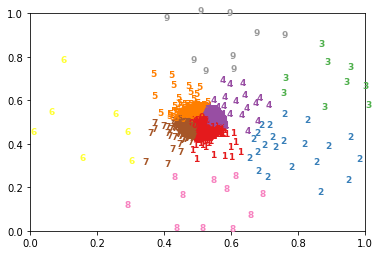

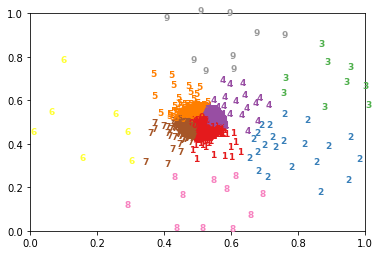

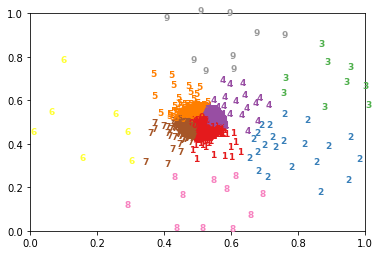

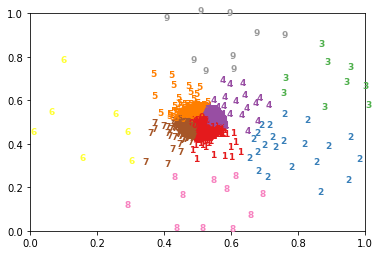

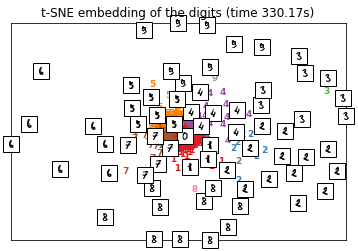

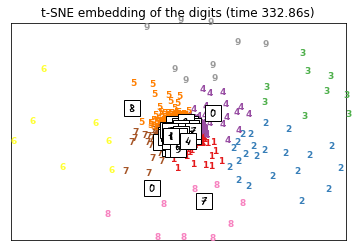

In [117]:
digits = load_digits(n_class= 10)

plot_embedding(X_tsne, y,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plot_embedding_test(X_tsne, y,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

In [121]:
X_comb = cor.comps[0]

In [122]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X_comb)

Computing t-SNE embedding


In [148]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(X_comb)
y = kmeans.labels_

In [ ]:
digits = load_digits(n_class= 10)

plot_embedding(X_tsne, y,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plot_embedding_test(X_tsne, y,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

In [174]:
label_pred = kmeans.labels_[seeds[0]]

In [175]:
import sklearn.metrics

metrics.completeness_score(seeds[1], label_pred)

0.2862546979240787

Computing PCA projection


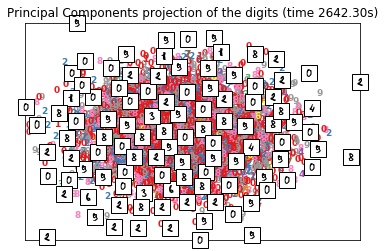

In [172]:
import sklearn.decomposition
print("Computing PCA projection")
X_pca = TruncatedSVD(n_components=2).fit_transform(X_comb)
plot_embedding(X_pca, y,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))
plt.show()